In [67]:
import numpy as np
import pandas as pd
import nsfg

from matplotlib import pyplot

preg = nsfg.ReadFemPreg()
df = pd.DataFrame(preg)
live = preg[preg.outcome == 1]
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [68]:
df = df[['caseid', 'pregordr','totalwgt_lb']]
df.head()

,caseid,pregordr,totalwgt_lb
0,1,1,8.8125
1,1,2,7.8750
2,2,1,9.1250
3,2,2,7.0000
4,2,3,6.1875


In [69]:
df['pregordr'] = df['pregordr'].replace([1],'First Born')
df['pregordr'] = df['pregordr'].replace([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],'Other Born')
df

,caseid,pregordr,totalwgt_lb
0,1,First Born,8.8125
1,1,Other Born,7.8750
2,2,First Born,9.1250
3,2,Other Born,7.0000
4,2,Other Born,6.1875
...,...,...,...
13588,12571,First Born,6.1875
13589,12571,Other Born,NaN
13590,12571,Other Born,NaN
13591,12571,Other Born,7.5000


In [70]:
fist_born_df= df[df.pregordr == 'First Born']
other_born_df= df[df.pregordr == 'Other Born']

In [71]:
fist_born_df[['caseid', 'totalwgt_lb']]

,caseid,totalwgt_lb
0,1,8.8125
2,2,9.1250
5,6,8.5625
8,7,7.5625
10,12,7.8125
...,...,...
13578,12566,6.0000
13580,12568,NaN
13583,12569,NaN
13585,12570,NaN


In [72]:
other_born_df[['caseid', 'totalwgt_lb']]

,caseid,totalwgt_lb
1,1,7.8750
3,2,7.0000
4,2,6.1875
6,6,9.5625
7,6,8.3750
...,...,...
13587,12570,NaN
13589,12571,NaN
13590,12571,NaN
13591,12571,7.5000


In [73]:
result= pd.merge(fist_born_df, other_born_df, on=["caseid"])
print(result)

      caseid  pregordr_x  totalwgt_lb_x  pregordr_y  totalwgt_lb_y
0          1  First Born         8.8125  Other Born         7.8750
1          2  First Born         9.1250  Other Born         7.0000
2          2  First Born         9.1250  Other Born         6.1875
3          6  First Born         8.5625  Other Born         9.5625
4          6  First Born         8.5625  Other Born         8.3750
...      ...         ...            ...         ...            ...
8555   12570  First Born            NaN  Other Born            NaN
8556   12571  First Born         6.1875  Other Born            NaN
8557   12571  First Born         6.1875  Other Born            NaN
8558   12571  First Born         6.1875  Other Born         7.5000
8559   12571  First Born         6.1875  Other Born         7.5000

[8560 rows x 5 columns]


In [74]:
lst_df=result.sort_values('totalwgt_lb_y',ascending=False).drop_duplicates('caseid').sort_index()
print(lst_df)

      caseid  pregordr_x  totalwgt_lb_x  pregordr_y  totalwgt_lb_y
0          1  First Born         8.8125  Other Born         7.8750
1          2  First Born         9.1250  Other Born         7.0000
3          6  First Born         8.5625  Other Born         9.5625
5          7  First Born         7.5625  Other Born         6.6250
6         14  First Born         7.0000  Other Born         4.0000
...      ...         ...            ...         ...            ...
8550   12566  First Born         6.0000  Other Born         7.0000
8551   12568  First Born            NaN  Other Born         6.3750
8553   12569  First Born            NaN  Other Born         6.3750
8554   12570  First Born            NaN  Other Born            NaN
8558   12571  First Born         6.1875  Other Born         7.5000

[3766 rows x 5 columns]


In [75]:
lst_df['result'] = lst_df['totalwgt_lb_x'] >= lst_df['totalwgt_lb_y']
print(lst_df)

      caseid  pregordr_x  totalwgt_lb_x  pregordr_y  totalwgt_lb_y  result
0          1  First Born         8.8125  Other Born         7.8750    True
1          2  First Born         9.1250  Other Born         7.0000    True
3          6  First Born         8.5625  Other Born         9.5625   False
5          7  First Born         7.5625  Other Born         6.6250    True
6         14  First Born         7.0000  Other Born         4.0000    True
...      ...         ...            ...         ...            ...     ...
8550   12566  First Born         6.0000  Other Born         7.0000   False
8551   12568  First Born            NaN  Other Born         6.3750   False
8553   12569  First Born            NaN  Other Born         6.3750   False
8554   12570  First Born            NaN  Other Born            NaN   False
8558   12571  First Born         6.1875  Other Born         7.5000   False

[3766 rows x 6 columns]


In [76]:
lst_df['result'].value_counts()

False    2885
True      881
Name: result, dtype: int64

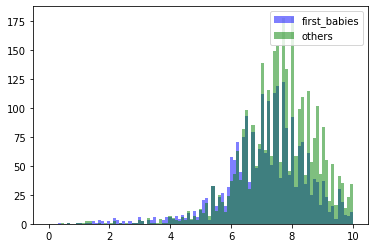

In [77]:
bins = np.linspace(0, 10, 100)
pyplot.hist(lst_df['totalwgt_lb_x'], bins, alpha=0.5, label='first_babies', color='blue')
pyplot.hist(lst_df['totalwgt_lb_y'], bins, alpha=0.5, label='others', color='green')
pyplot.legend(loc='upper right')
pyplot.show()